In [1]:
import pandas as pd
import seaborn as sns

In [2]:
diabetes_DF = pd.read_csv('diabetes.csv')
diabetes_DF

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

The overall values of each column are examined, as well as their data type.

In [3]:
diabetes_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Exploring the relationship between BMI and Age. Rows with BMI values of 0 were dropped completely from the dataset. From my knowledge, this is a very important metric when predicting Diabetes. Replacing it with an average value could incorrectly water down the results. 

<Axes: xlabel='Age', ylabel='BMI'>

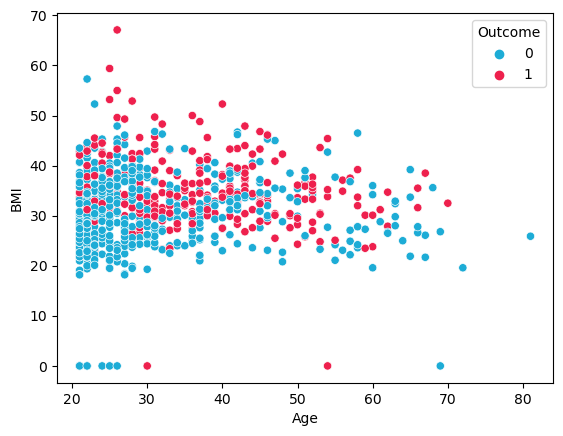

In [4]:
diagnosis_palette = sns.crayon_palette(['Cerulean', 'Red'])
sns.scatterplot(data = diabetes_DF, x = 'Age', y = 'BMI', hue = 'Outcome', palette = diagnosis_palette)

In [5]:
Error_BMI = diabetes_DF[diabetes_DF['BMI'] < 10].index

Exploring the BloodPressure and SkinThickness columns. Extreme outliers were either removed from the data set or replaced by the mean value of the respective column.

<Axes: xlabel='BloodPressure', ylabel='SkinThickness'>

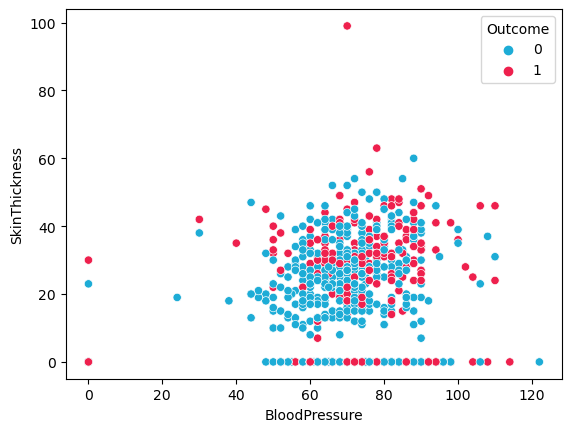

In [6]:
sns.scatterplot(data = diabetes_DF, x = 'BloodPressure', y = 'SkinThickness', hue = 'Outcome', palette = diagnosis_palette)

In [7]:
Error_BloodPressure = diabetes_DF[diabetes_DF['BloodPressure'] < 5].index

Mean_SkinThickness = diabetes_DF['SkinThickness'].mean()
diabetes_DF.loc[diabetes_DF['SkinThickness'] < 1, 'SkinThickness'] = Mean_SkinThickness
diabetes_DF.loc[diabetes_DF['SkinThickness'] > 75, 'SkinThickness'] = Mean_SkinThickness
diabetes_DF

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72      35.000000        0  33.6   
1              1       85             66      29.000000        0  26.6   
2              8      183             64      20.536458        0  23.3   
3              1       89             66      23.000000       94  28.1   
4              0      137             40      35.000000      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76      48.000000      180  32.9   
764            2      122             70      27.000000        0  36.8   
765            5      121             72      23.000000      112  26.2   
766            1      126             60      20.536458        0  30.1   
767            1       93             70      31.000000        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

Exploring the Glucose and Insulin columns. Only a couple of extreme Glucose outliers were dropped. I'm unsure of how normal insulin levels of 0 are, but there are enough data points to lead me to believe that it is not just an error.

<Axes: xlabel='Glucose', ylabel='Insulin'>

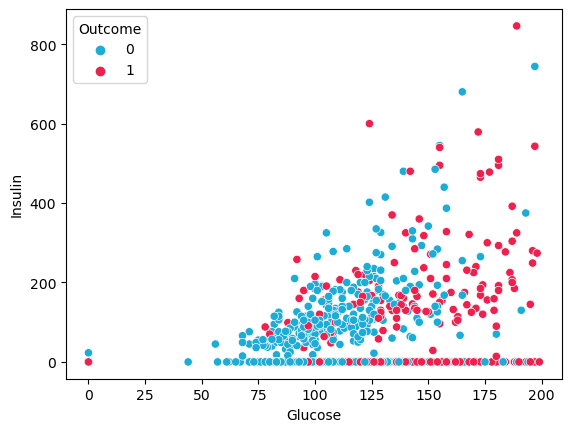

In [8]:
sns.scatterplot(data = diabetes_DF, x = 'Glucose', y = 'Insulin', hue = 'Outcome', palette = diagnosis_palette)

In [9]:
Error_Glucose = diabetes_DF[diabetes_DF['Glucose'] < 1].index

In [10]:
Error_List = [Error_BloodPressure, Error_BMI, Error_Glucose]

for Error in Error_List:
    try:
        diabetes_DF.drop(Error, inplace = True)
    except KeyError:
        continue

Exploring the Age and DiabetesPedigreeFunction variables. No specific actions were taken for these columns.

<Axes: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

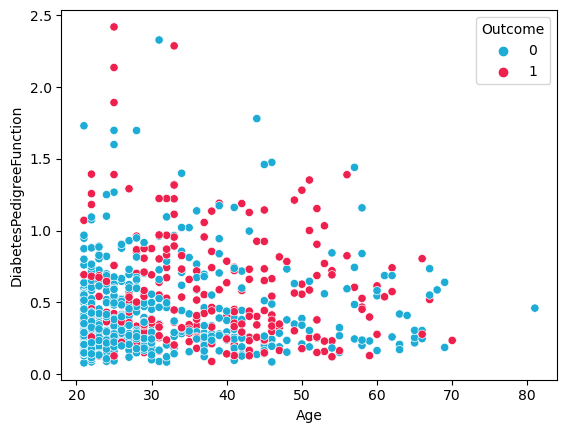

In [11]:
sns.scatterplot(data = diabetes_DF, x = 'Age', y = 'DiabetesPedigreeFunction', hue = 'Outcome', palette = diagnosis_palette)

In [12]:
def metric_averages(Metric):

    Average_Overall = diabetes_DF[Metric].mean()
    Average_Positive = diabetes_DF.loc[diabetes_DF['Outcome'] == 1, Metric].mean()
    Average_Negative = diabetes_DF.loc[diabetes_DF['Outcome'] == 0, Metric].mean()

    Metric_Means = {
        Average_Overall: 'of all subjects of the data', 
        Average_Positive: 'of subjects with diabetes', 
        Average_Negative: 'of subjects without diabetes'
    }

    for Mean, value in Metric_Means.items():
        print(f'The average {Metric} {value} is {Mean}.')

In [13]:
metric_averages('Pregnancies')

The average Pregnancies of all subjects of the data is 3.8626373626373627.
The average Pregnancies of subjects with diabetes is 4.92.
The average Pregnancies of subjects without diabetes is 3.309623430962343.


In [14]:
metric_averages('Glucose')

The average Glucose of all subjects of the data is 121.87362637362638.
The average Glucose of subjects with diabetes is 142.54.
The average Glucose of subjects without diabetes is 111.06485355648536.


In [15]:
metric_averages('BloodPressure')

The average BloodPressure of all subjects of the data is 72.43818681318682.
The average BloodPressure of subjects with diabetes is 75.332.
The average BloodPressure of subjects without diabetes is 70.92468619246861.


In [16]:
metric_averages('SkinThickness')

The average SkinThickness of all subjects of the data is 26.753584306318682.
The average SkinThickness of subjects with diabetes is 29.030791666666666.
The average SkinThickness of subjects without diabetes is 25.56257627266388.


In [17]:
metric_averages('Insulin')

The average Insulin of all subjects of the data is 84.15247252747253.
The average Insulin of subjects with diabetes is 107.56.
The average Insulin of subjects without diabetes is 71.91004184100419.


In [18]:
metric_averages('BMI')

The average BMI of all subjects of the data is 32.28873626373626.
The average BMI of subjects with diabetes is 35.172399999999996.
The average BMI of subjects without diabetes is 30.780543933054393.


In [19]:
metric_averages('Age')

The average Age of all subjects of the data is 33.39423076923077.
The average Age of subjects with diabetes is 37.408.
The average Age of subjects without diabetes is 31.294979079497907.


In [20]:
export_DF = diabetes_DF

export_DF.to_csv('cleaner_diabetes.csv')